# **EXPERIMENT 5**

###Q1. Use the Wine.csv Dataset to realize the Principal Component Analysis 


In [ ]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the Dataset
Dataset = pd.read_csv('Wine.csv')
X = Dataset.iloc[:,:-1].values
Y = Dataset.iloc[:,-1].values

In [ ]:
# Splitting the Dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=36) #change test size

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)  #change Components
X_train = pca.fit_transform(X_train)

X_test = pca.transform(X_test)

In [ ]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[11  0  0]
 [ 1 12  0]
 [ 0  1 11]]


0.9444444444444444

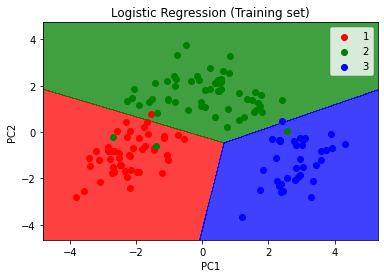

In [ ]:
# Visualising the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

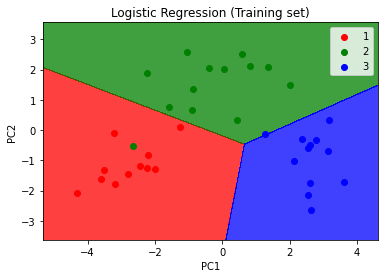

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### **Use the appropriate dataset to realize multiple linear regression and show that how various statistical tools like p-value, t-score etc can be used for dimensionality reduction.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('50_Startups.csv')


In [ ]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
x = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df['Profit']
x.head(6)
y.head(6)


0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
5    156991.12
Name: Profit, dtype: float64

In [ ]:
x = pd.get_dummies(x)
x.head(6)

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size = 0.3, random_state = 0) #make change here 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
pred = lm.predict(x_test)

In [ ]:
y_pred = lm.predict(x_test)
print('Train Score: ', lm.score(x_train, y_train))
print('Test Score: ', lm.score(x_test, y_test))

Train Score:  0.951557126270021
Test Score:  0.9358680970046517


In [ ]:
from sklearn.metrics import mean_squared_error
print("The Mean Squared Error is: {}".format(mean_squared_error(y_test, y_pred)))

The Mean Squared Error is: 61903144.40236704


In [ ]:
import statsmodels.regression.linear_model as sm
# add a column of ones as integer data type
x = np.append(arr = np.ones((50, 1)).astype(int),
values = x, axis = 1)
# choose a Significance level usually 0.05, if p>0.05
# for the highest values parameter, remove that value
x_opt = x[:, [0, 1, 2, 3, 4, 5]]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.34e-27
Time:                        13:14:25   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4            41.8870   3256.039      0.013      0.990   -6520.229    6604.003
x5           240.6758   3338.857      0.072      0.943   -6488.349    6969.701
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



```
import statsmodels.regression.linear_model as sm

# Add a column of ones as integer data type
x = np.append(arr=np.ones((50, 1)).astype(int), values=x, axis=1)

# Choose a significance level, usually 0.05. Let's set it to 0.01 instead.
sig_level = 0.01

# Fit the OLS model and extract the p-values of the coefficients
ols_model = sm.OLS(endog=y, exog=x).fit()
p_values = ols_model.pvalues

# Check which coefficients are significant based on the new significance level
significant_vars = (p_values <= sig_level)
print("Variables with p-value below {}:".format(sig_level))
print(p_values[significant_vars])

# Create a new design matrix with only the significant variables
x_sig = x[:, significant_vars]

# Refit the OLS model with the reduced set of variables
ols_model_sig = sm.OLS(endog=y, exog=x_sig).fit()

# Print the summary statistics of the reduced model
print("\nReduced model summary:")
print(ols_model_sig.summary())

```



In [ ]:
# remove the 4th column as it has the highest value
x_opt = x[:, [0, 1, 2, 3, 5]]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()
# remove the 5th column as it has the highest value
x_opt = x[:, [0, 1, 2, 3]]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()
# remove the 3rd column as it has the highest value
x_opt = x[:, [0, 1, 2]]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()
# remove the 2nd column as it has the highest value
x_opt = x[:, [0, 1]]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()
#After running this cell, we will left with only one column at the end and that is the R&D spent.
#We can conclude that the company which has maximum expenditure on the R&D makes the highest profit.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           3.50e-32
Time:                        13:14:25   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""